In [ ]:
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 3.1 MB/s 
     |████████████████████████████████| 8.2 MB 19.3 MB/s 
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=70d60ae66153c41526aa8d58fd42fea496c6915ddf30a102699a08dbe6e5cc14
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
Successfully built docopt


In [ ]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
from nltk import word_tokenize
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import collections
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from itertools import chain

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def SM_lemmatizer_dumb(x):

    SW = stopwords.words("russian")
    SW.remove('хорошо')
    SW.remove('нет')
    SW = SW + ['этот', 'тот', 'это', 'около', 'возможно', 'наверное', 'вероятно']

    x = list(map(str.lower, x))

    x_nopunct = ["".join([char for char in text if char not in string.punctuation]) for text in x]
    
    words = list()

    for x_ in x_nopunct:
       words.append(word_tokenize(x_, language='russian'))

    final_lemmas = list()

    #блок работы с лемматизацией

    for word_set in words:
      words_lemmatized = list(map(lambda z: morph.parse(z)[0][2], word_set))        
      
      words_with_ne = list()
      for i in range(0,len(words_lemmatized)):

        if len(words_lemmatized) == 1 and (words_lemmatized[i] == 'нет' or words_lemmatized[i] == 'ничего'  or words_lemmatized[i] == 'всё'):
          words_with_ne.append(words_lemmatized[i])
        
        elif words_lemmatized[i] == 'нет' or words_lemmatized[i] == 'ничего' or words_lemmatized[i] == 'недостаточно' or words_lemmatized[i] == 'такой' or words_lemmatized[i] == 'много' or words_lemmatized[i] == 'не' or words_lemmatized[i] == 'слишком' or words_lemmatized[i] == 'очень':
          pass
        
        elif (i != 0 and ((words_lemmatized[i-1] == 'нет' and  words_lemmatized[i] == 'такой') or (words_lemmatized[i] == 'нет' and  words_lemmatized[i-1] == 'такой') or (words_lemmatized[i-1] == 'ничего' and  words_lemmatized[i] == 'такой'))):
          words_with_ne.append('нет')
        
        elif (i > 1 and words_lemmatized[i-2] == 'не' and words_lemmatized[i-1] == 'очень' ) or (i!= 0 and (words_lemmatized[i-1] == 'не' or  words_lemmatized[i-1] == 'ничего' or words_lemmatized[i-1] == 'нет')) or (i > 1 and ((words_lemmatized[i-2] == 'нет' and words_lemmatized[i-1] == 'ничего') or (words_lemmatized[i-2] == 'ничего' and words_lemmatized[i-1] == 'нет'))) :
          words_with_ne.append('не_'+words_lemmatized[i])
        
        elif  (i > 1 and (words_lemmatized[i-2] == 'слишком' or words_lemmatized[i-2] == 'очень') and words_lemmatized[i-1] == 'много') or (i != 0 and (words_lemmatized[i-1] == 'слишком' or words_lemmatized[i-1] == 'сильно' or words_lemmatized[i-1] == 'самый' or  words_lemmatized[i-1] == 'излишне' or  words_lemmatized[i-1] == 'чересчур' or words_lemmatized[i-1] == 'много')) :
          words_with_ne.append('слишком_'+words_lemmatized[i])
        
        elif (i != 0 and (words_lemmatized[i-1] == 'мало' or  words_lemmatized[i-1] == 'недостаточно')): 
          words_with_ne.append('мало_'+words_lemmatized[i])

        elif (words_lemmatized[i] == 'всё' and i != len(words_lemmatized)): # 'всё хорошо' -> 'хорошо'; 'понравилось всё' -> ['нравиться', 'всё']
          pass

        else:
          words_with_ne.append(words_lemmatized[i])    

      words_lemmatized = list(filter(lambda y: y not in SW, words_with_ne))
      final_lemmas.append(words_lemmatized)

      #блок работы со словосочетаниями, сейчас есть только прилагательное+существительное на основе списка токенов без стоп-слов
      
      adj_nouns = list()
      for words_lemmatized_set in final_lemmas:

          couples = list()

          for j in range(1,len(words_lemmatized_set)):

              if str(morph.parse(words_lemmatized_set[j-1])[0][1])[:4] == 'ADJF' and str(morph.parse(words_lemmatized_set[j])[0][1])[:4] == 'NOUN':

                  couples.append(" ".join([words_lemmatized_set[j-1], words_lemmatized_set[j]]))

          adj_nouns.append(couples)  
    
    return final_lemmas, adj_nouns

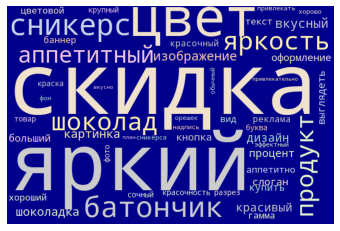

In [ ]:

data_1 = pd.read_excel("/content/drive/MyDrive/clouds/camp_Mars_bannery_02.08_#4_survey.xlsx")

qs = ['Что Вас привлекло в баннере?']

for q in qs: 
    print('\n\n')

    top_words = list(chain(*SM_lemmatizer_dumb([x for x in data_1[q].tolist() if str(x) != 'nan'])[0]))

    data_1['lemmas_'+q] = SM_lemmatizer_dumb([" " if str(x) == 'nan' else x for x in data_1[q].tolist()])[0]

    # расхешировать для показа топ-слов и их количества во всем вопросе
    # for w in collections.Counter(top_words).most_common():
    #     print(w)

    top_couples = list(chain(*SM_lemmatizer_dumb([x for x in data_1[q].tolist() if str(x) != 'nan'])[1]))

    data_1['couples_'+q] = SM_lemmatizer_dumb([" " if str(x) == 'nan' else x for x in data_1[q].tolist()])[1]

    word_cloud = WordCloud(
                width=600,
                height=400,
                max_words = 50,
                random_state=1,
                background_color="darkblue",
                colormap="Pastel2",
                collocations=False
                ).generate(" ".join(top_words+top_couples))

    %matplotlib inline

    plt.imshow(word_cloud)
    plt.axis("off")
    plt.show(block=False)
    # word_cloud.to_file("/content/drive/MyDrive/clouds/test_wc_splitbyq_withoutdostevski_withne_{}.png".format(str(1)))